## Observations and Insights 

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mousedata_df = pd.merge(mouse_metadata,study_results, how = 'outer', on = 'Mouse ID' )

# Display the data table for preview
combined_mousedata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [27]:
# Checking the number of mice.
combined_mousedata_df['Mouse ID'].nunique()

249

In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# count_row = combined_mousedata_df.shape[0]
# print (count_row)

duplicates = combined_mousedata_df[combined_mousedata_df.duplicated(subset = ['Mouse ID', 'Timepoint'], keep = False)]
print (duplicates)

duplicates[duplicates.duplicated(['Mouse ID', 'Timepoint'])]



    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
911           47.570392        

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [29]:
# Optional: Get all the data for the duplicate mouse ID. 

mousedata_cleaned = combined_mousedata_df.loc[combined_mousedata_df['Mouse ID'] != 'g989']

mousedata_cleaned


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


In [31]:
# Checking the number of mice in the clean DataFrame.
mousedata_cleaned['Mouse ID'].nunique()

248

## Summary Statistics

In [32]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
tumour_data = mousedata_cleaned.groupby(['Drug Regimen'])

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

prescription_var = tumour_data["Tumor Volume (mm3)"].var()
prescription_std = tumour_data["Tumor Volume (mm3)"].std()
prescription_median = tumour_data["Tumor Volume (mm3)"].median()
prescription_mean = tumour_data["Tumor Volume (mm3)"].mean()
prescription_sem = tumour_data["Tumor Volume (mm3)"].sem()
# Assemble the resulting series into a single summary dataframe.

prescription_summary = pd.DataFrame({"Variance":prescription_var, "Standard Dev.":prescription_std, "Median": prescription_median
                                    , "Mean": prescription_mean, "Sem": prescription_sem
                                    })
# print(prescription_summary)

prescription_summary.round(2)


,Variance,Standard Dev.,Median,Mean,Sem
Drug Regimen,,,,,
Capomulin,24.95,4.99,41.56,40.68,0.33
Ceftamin,39.29,6.27,51.78,52.59,0.47
Infubinol,43.13,6.57,51.82,52.88,0.49
Ketapril,68.55,8.28,53.70,55.24,0.60
Naftisol,66.17,8.13,52.51,54.33,0.60
Placebo,61.17,7.82,52.29,54.03,0.58
Propriva,43.85,6.62,50.45,52.32,0.54
Ramicane,23.49,4.85,40.67,40.22,0.32
Stelasyn,59.45,7.71,52.43,54.23,0.57


In [33]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

summary_stats = mousedata_cleaned.groupby('Drug Regimen')

aggregated = summary_stats.agg(['mean', 'median', 'var', 'std', 'sem'])["Tumor Volume (mm3)"]
aggregated


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     148
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Mouse ID, dtype: int64


Text(0, 0.5, 'Data')

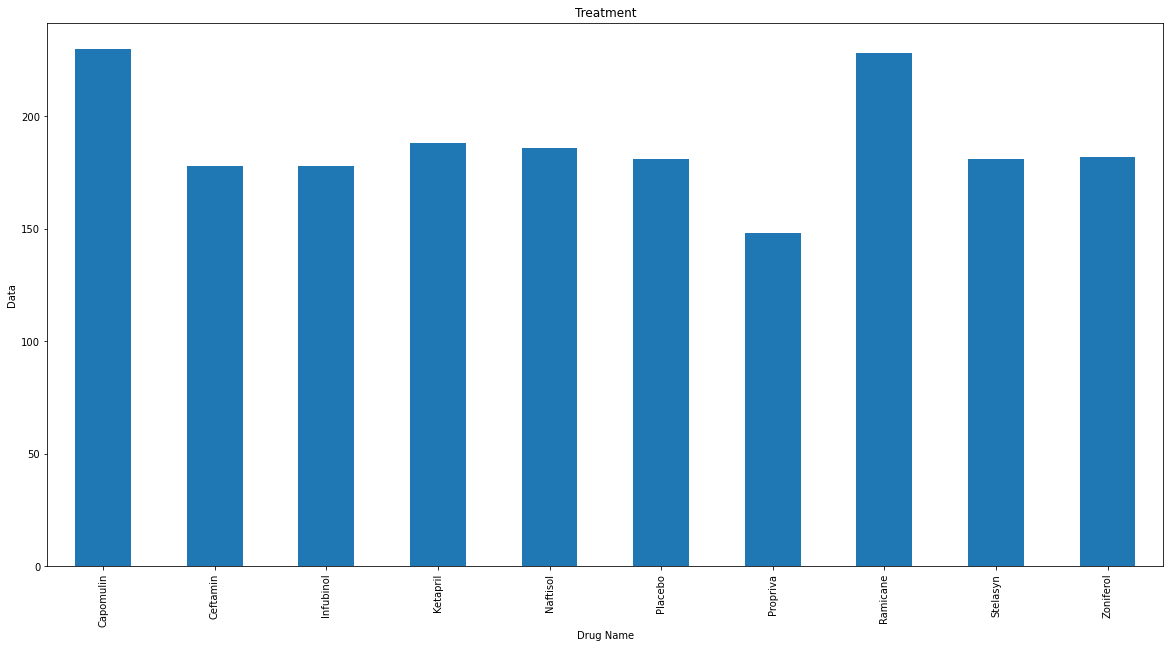

In [104]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
datapoints_regimen = mousedata_cleaned.groupby(["Drug Regimen"]).count () ["Mouse ID"]
print(datapoints_regimen)

datapoints_regimen.plot (kind = "bar", figsize = (20,10))

# Labelling
plt.title ("Treatment")
plt.xlabel("Drug Name")
plt.ylabel("Data")

[230, 178, 178, 188, 186, 181, 148, 228, 181, 182]


Text(0.5, 1.0, 'Drug Regiment')

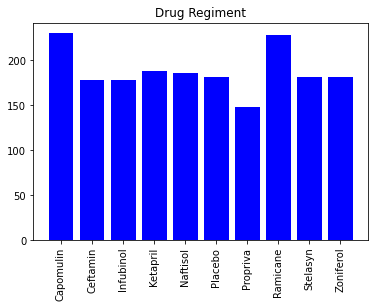

In [105]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

pyplot_barchart = (mousedata_cleaned.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()
print(pyplot_barchart)

x_axis = np.arange(len(datapoints_regimen))

plt.bar(x_axis, pyplot_barchart, color='b', alpha=1., align='center')

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')


plt.title("Drug Regiment")




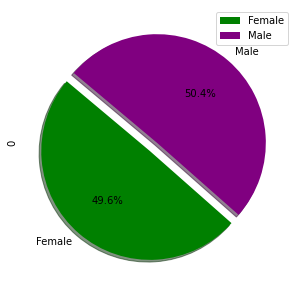

In [106]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mouse_gender_grouped = mousedata_cleaned.groupby (["Mouse ID", "Sex"])
mouse_gender_grouped

mouse_gender_grouped_df = pd.DataFrame(mouse_gender_grouped.size())

mouse_gender_df = pd.DataFrame (mouse_gender_grouped_df.groupby(["Sex"]).count())
mouse_gender_df

colors = ['green', 'purple']
explode = (0.1, 0)
plot = mouse_gender_df.plot.pie(subplots = True,figsize=(5,5), colors = colors, startangle=140, explode = explode, shadow = True, autopct="%1.1f%%")


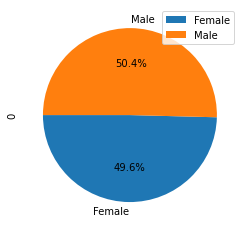

In [107]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

Piechart_plot = mouse_gender_df.plot.pie(autopct="%1.1f%%", startangle=180, subplots = True)



## Quartiles, Outliers and Boxplots

In [108]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin



# Start by getting the last (greatest) timepoint for each mouse

                                                        
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

maxtumor_df = pd.DataFrame(mousedata_cleaned.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})
maxtumor_df

collateddf = pd.merge(mousedata_cleaned, maxtumor_df, on='Mouse ID')
collateddf.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [109]:
# Put treatments into a list for for loop (and later for plot labels)

prescriptions = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

prescription_list = []

# Create empty list to fill with tumor vol data (for plotting)
for prescription in prescriptions:

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) |(final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IndentationError: expected an indented block (<ipython-input-109-c018dab76415>, line 10)

In [98]:
# Calculations for interquartile

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Design a for loop for calculating the IQR
for drug in drugs:
    
    # Design a stopgap dataframe to identify the drugs 
    temp_df = collateddf.loc[collateddf['Drug Regimen'] == drug]

    # Identify Timepoints based on stopgrap for loop
    finaldf = temp_df.loc[temp_df['Timepoint'] == temp_df['max_timepoint']]
    
    # Append the finaldf output to values
    output_values = finaldf['Tumor Volume (mm3)']
    drug_values.append(output_values)
    
    # Calculate IQR
    quartiles = output_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Calculate upper and lower IQR
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower {drug}: {lower_bound}')
    print(f'Upper {drug}: {upper_bound}')
    
    # Outlier calculation
    outliers_count = (output_values.loc[(finaldf['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (finaldf['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'{drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Capomulin: 20.70456164999999
Upper Capomulin: 51.83201549
Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Ramicane: 17.912664470000003
Upper Ramicane: 54.30681135
Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Infubinol: 36.83290494999999
Upper Infubinol: 82.74144559000001
Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Ceftamin: 25.355449580000002
Upper Ceftamin: 87.66645829999999
Ceftamin outliers: 0


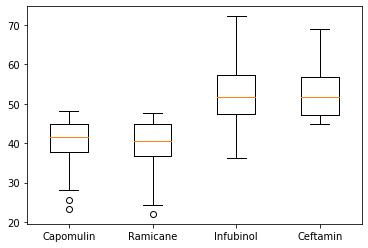

In [100]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Cap = mousedata_cleaned.loc[mousedata_cleaned['Drug Regimen'] =='Capomulin', 'Tumor Volume (mm3)']
Ram = mousedata_cleaned.loc[mousedata_cleaned['Drug Regimen'] =='Ramicane', 'Tumor Volume (mm3)']
Inf = mousedata_cleaned.loc[mousedata_cleaned['Drug Regimen'] =='Infubinol', 'Tumor Volume (mm3)']
Cef = mousedata_cleaned.loc[mousedata_cleaned['Drug Regimen'] =='Ceftamin', 'Tumor Volume (mm3)']


plt.boxplot([Cap, Ram, Inf, Cef], labels=drugs)
plt.show()

## Line and Scatter Plots

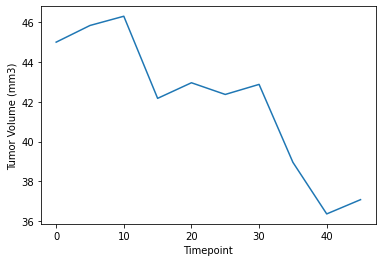

In [99]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouseovertime = mousedata_cleaned.loc[mousedata_cleaned['Mouse ID'] == 'g288']

plt.plot(mouseovertime['Timepoint'], mouseovertime['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

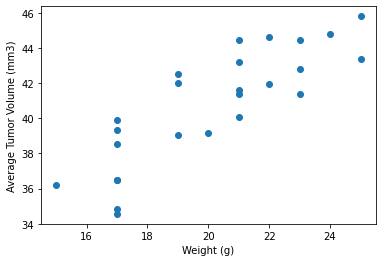

In [84]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

capomulin_df = mousedata_cleaned.loc[mousedata_cleaned['Drug Regimen'] == 'Capomulin']
capavg = capomulin_df.groupby(['Mouse ID']).mean()
plt.scatter(capavg['Weight (g)'],capavg['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

## Correlation and Regression

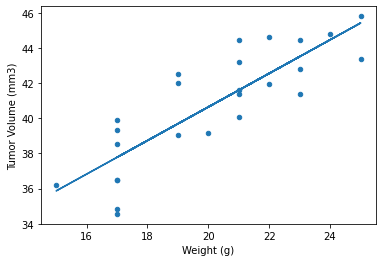

Correlation is 0.84.
Linear Regression is y=0.9544396890241045x+21.55216053268501


In [91]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = capavg['Weight (g)']
y = capavg['Tumor Volume (mm3)']
m, b = np.polyfit(x, y, 1)
capavg.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)")
plt.plot(x, m*x + b)
plt.show()
correlation = st.pearsonr(x,y)
print(f"""Correlation is {round(correlation[0],2)}.""")
print(f"""Linear Regression is y={m}x+{b}""")